In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def normalize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X = (X - mean) / std
    return X

def append_bias_reshape(features,labels):
    m = features.shape[0]
    n = features.shape[1]
    x = np.reshape(np.c_[np.ones(m),features],[m,n + 1])
    y = np.reshape(labels,[m,1])
    return x, y

In [3]:
boston = tf.contrib.learn.datasets.load_dataset('boston')
X_train, Y_train = np.array(boston.data), np.array(boston.target)
X_train = normalize(X_train)
X_train, Y_train = append_bias_reshape(X_train, Y_train)
#Y_train = normalize(Y_train)
m = len(X_train)  #Number of training examples
n = 14   # Number of features

# Placeholder for the Training Data
X = tf.placeholder(tf.float32, name='X', shape=[m,n])
Y = tf.placeholder(tf.float32, name='Y')

# Variables for coefficients
#b = tf.Variable(0.0)
w = tf.Variable(tf.random_normal([n,1]))


# The Linear Regression Model
Y_hat = tf.matmul(X, w) 

# Loss function
loss = tf.reduce_mean(tf.square(Y - Y_hat, name='loss'))

# Gradient Descent with learning rate of 0.05 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(loss)

# Initializing Variables
init_op = tf.global_variables_initializer()

In [4]:
total = []
# Computation Graph
with tf.Session() as sess:
    # Initialize variables
    sess.run(init_op)
    writer = tf.summary.FileWriter('graphs', sess.graph)

    # train the model for 100 epcohs
    for i in range(2000):
       _, l = sess.run([optimizer, loss], feed_dict={X: X_train, Y: Y_train})
       total.append(l)
       if i%100 == 0:
        print('Epoch {0}: Loss {1}'.format(i, l))

    writer.close()

    Y_pred = sess.run(Y_hat,feed_dict = {X:X_train} )

    w_value = sess.run(w)

Epoch 0: Loss 638.3056640625
Epoch 100: Loss 33.49674987792969
Epoch 200: Loss 23.471540451049805
Epoch 300: Loss 22.737070083618164
Epoch 400: Loss 22.42255401611328
Epoch 500: Loss 22.243764877319336
Epoch 600: Loss 22.13581085205078
Epoch 700: Loss 22.067272186279297
Epoch 800: Loss 22.02165985107422
Epoch 900: Loss 21.990066528320312
Epoch 1000: Loss 21.967451095581055
Epoch 1100: Loss 21.950855255126953
Epoch 1200: Loss 21.938457489013672
Epoch 1300: Loss 21.92908477783203
Epoch 1400: Loss 21.921932220458984
Epoch 1500: Loss 21.916454315185547
Epoch 1600: Loss 21.9122314453125
Epoch 1700: Loss 21.908966064453125
Epoch 1800: Loss 21.906448364257812
Epoch 1900: Loss 21.904495239257812


Predicted value: $20539.45  Actual value: $16800.0 
Done


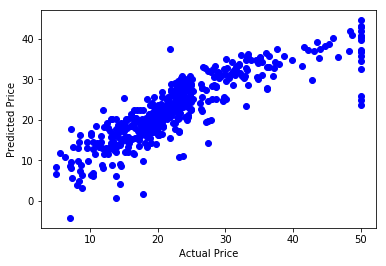

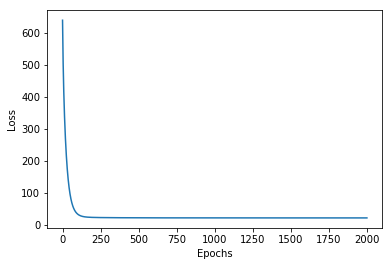

In [5]:
N= 500
X_new = X_train
#Y_pred =  np.matmul(X_new, w_value) # + b_value)
print('Predicted value: ${0:.2f}  Actual value: ${1}'.format(Y_pred[N][0]*1000, Y_train[N][0]*1000) , '\nDone')
# Plot the result
#print(Y_pred.shape, Y_train.shape)
plt.plot(Y_train, Y_pred, 'bo')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()
#
plt.plot(total)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


In [6]:
# The coefficients
w_value

array([[  2.25327606e+01],
       [ -9.06870961e-01],
       [  1.05719388e+00],
       [  7.08648488e-02],
       [  6.92451715e-01],
       [ -2.04395556e+00],
       [  2.68448949e+00],
       [  9.43273585e-03],
       [ -3.10718179e+00],
       [  2.47692680e+00],
       [ -1.87059569e+00],
       [ -2.05464840e+00],
       [  8.55439901e-01],
       [ -3.74148345e+00]], dtype=float32)